In [12]:
import numpy as np
import datetime
from keras.utils import plot_model
from keras import backend as K
from src.modeling_tools import data_generator
import src.preprocess as prep
import src.modeling_tools as mtools
from src.plot_tools import plot_samples
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
today = datetime.datetime.now().strftime("%m%d%Y")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Demo
For this demo we will load a very small data set (n=500) for user to understand the structure of the input data and how the k-folds ensembling works. This model that is fit is not intended to be used, but please see the chimera_{ensemble number}.h5 and chimera_{ensemble number}.json for fitted parameters on the CA/NV dataset.

In [7]:
X = prep.get_data('./data/chimera_Xtest.bz2')
y = prep.get_data('./data/chimera_ytest.bz2')

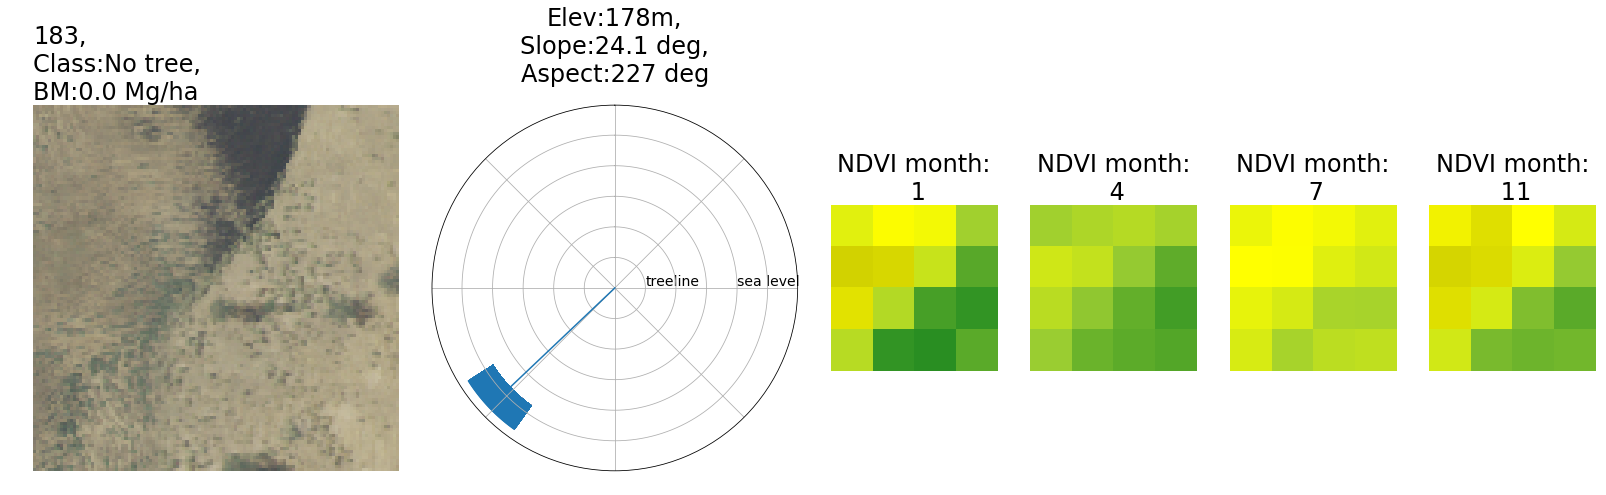

In [8]:
#visualize the data
uid =  np.random.randint(low=0,high=len(X[0]))
plot_samples(X, y, uid)

In [ ]:
k = 5
n = len(X[0])
train_idx, val_idx = mtools.k_fold_sampler(n,k)
#iterate through the k-folds for the dataset
epochs=90
batch_size=100

for model_num in range(k):
    K.clear_session()
    #get the model_num k-fold dataset
    X_train, y_train, X_val, y_val = mtools.get_samples(X, y, \
                                                        train_idx[model_num], \
                                                        val_idx[model_num]) 
    #train the model
    chmra, model_history = mtools.train_kfold(X_train, y_train, X_val, y_val,\
                                              model_num, batch_size, epochs)
    #save model training run
    print('Writing out model results!')
    mtools.write_model(chmra, model_history, model_num, epochs) 
